<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module2/a_GraphicalMethod_Maximize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Graphical Method (Maximize Objective Function)
______________________________________
**OPIM 5641: Business Decision Modeling - University of Connecticut**

The graphical method works only when there are two decision variables, but it provides valuable insight into how larger problems are solved. 

Take out a piece of paper and draw this while it is explained to you. Then try to replicate in Python (looking at the code on your second monitor, and then without looking!) If you can do this, you really know it - otherwise you're just going through the motions.

---------------------------------------------------------------------------
**Flair's Furniture** (from Chapter 2, Nagraj et. al)
Flair Furniture Company produces inexpensive tables and chairs. The production process for each is similar in that both require a certain number of labor hours in the carpentry department and a certain number of labor hours in the painting department. Each table takes 3 hours of carpentry work and 2 hours of painting work. Each chair requires 4 hours of carpentry and 1 hour of painting. During the current month, 2,400 hours of carpentry time and 1,000 hours of painting time are available. The marketing department wants Flair to make no more than 450 new chairs this month because there is a sizable existing inventory of chairs. However, because the existing inventory of tables is low, the marketing department wants Flair to make at least 100 tables this month. Each table sold results in a profit contribution of 7 USD, and each chair sold yields a profit contribution of 5 USD.  

Flair Furniture’s problem is to determine the best possible combination of tables and chairs to manufacture this month in order to attain the maximum profit. The firm would like this product mix situation formulated (and subsequently solved) as an LP problem.  

To provide a structured approach for formulating this problem (and any other LP problem, irrespective of size and complexity), we present a three-step process in the following sections - decision variables, objective function and constraints.

**Note:** often times, data is not presented in tables, but must be discerned from word problems/narrative like this!

### Decision Variables
Chairs (C) and Tables (T) that need to be produced.

Decision variables  (or choice variables) represent the unknown entities in a problem—that is, what we are solving for in the problem. For example, in the Flair Furniture problem, there are two unknown entities: the number of tables to be produced this month and the number of chairs to be produced this month. Note that all other unknowns in the problem (e.g., the total carpentry time needed this month) can be expressed as linear functions of the number of tables produced and the number of chairs produced. 

### Objective Function
 The objective function states the goal of a problem—that is, why we are trying to solve the problem. An LP model must have a single objective function. In most business-oriented LP models, the objective is to either maximize profit or minimize cost. The goal in this step is to express the profit (or cost) in terms of the *decision variables* defined earlier.

$Max(Z) = 7T + 5C$ `objective function`

### Constraints
subject to:
* $3T + 4C <= 2400$ `(carpentry time)`
* $2T + 1C <= 1000$ `(painting time)`
* $C <= 450$ `(maximum chairs allowed)`
* $T >= 100$ `(minimum tables required)`
* $T,C >= 0$ `(nonnegativity)`

## Import Modules

In [ ]:
%matplotlib inline
from pylab import * # for graphing

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     |████████████████████████████████| 9.1 MB 19.1 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 148489 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to un

# Plotting the Constraints on the Graph
To plot the constraints, we take each equation and we set one variable to 0 and see how the inequality updates.

For ease, we bring down our constraints one more time and plot them.

**Update (Sept 15, 2020):** We assume $T$ will be on the X axis, and $C$ will be on the Y axis. *There was originally a small typo in the video right here (where we said C was on the X axis, it's now been fixed), everything in the code and example is correct below! Also - this example identically follow's the example in the book - pls compare against my script*

### Constraints
* $3T + 4C <= 2400$ `(carpentry time)`
  * when T = 0, C = 2400/4 = 600
  * when C = 0, T = 2400/3 = 800
    * Plot the coordinates (T=0, C=600) and (T=800, C=0) and draw a line through them.
* $2T + 1C <= 1000$ `(painting time)`
  * when T = 0, C = 1000/1 = 1000
  * when C = 0, T = 1000/2 = 500
      * Plot the coordinates (T=0, C=1000) and (T=500, C=0) and draw a line through them.
* $C <= 450$ `(maximum chairs allowed)`
  * C = 450 (shade area above)
    * this is a horizontal line - since C is the Y axis, go up to 450 and draw a straight horizontal line and shade the area above this point since we can't make more than 450 tables.
* $T >= 100$ `(minimum tables required)`
  * T = 100 (shade area to the left)
    * this is a vertical line - since T is the X axis, go over to 100 and draw a straight vertical line (shade the area to the left, since we can't make less than 100 tables).
* $T,C >= 0$ `(nonnegativity)`
  * We always will be in the X1, Y1 plane - all decision variables must be positive numbers! 

## A quick note on filling the region in above or below a line.

* The last two parameters of the function indicate the color and the transparency level of the color being used, so their meaning should be clear. The other 3 parameters are used to indicate the region that will be colored by coordinate. 
   

* The i-th point of each of these 3 vectors indicate: an x coordinate, the lower y coordinate, and the the higher y coordinate. fill_between will color the region defined by the two lines represented by these points. 
   

* The lower line is given by coordinates (0,600), (800,0), and (1000,0), and the upper line (which coincides with the top of the plot) is given by the coordinates (0,1000), (800,1000), and (1000,1000).  
   
 
* With that, we color this trapezoid region using red. 
   
 
* For more clarification, please take a look at the documentation (there is also this nice reference in Google: 
  * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html

  * https://www.geeksforgeeks.org/matplotlib-pyplot-fill_between-in-python/ ) 
   

Text(110, 200, 'FEASIBLE REGION')

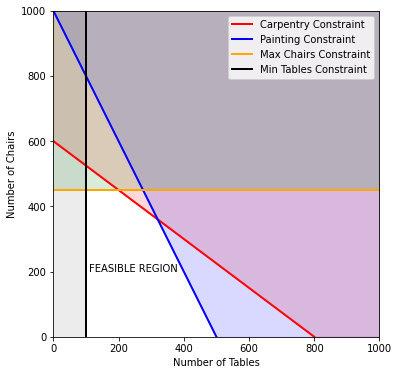

In [ ]:
# this is the example from Pyomo cookbook
# pylab makes it easy to make plots

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) #(T=0, C=600)
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Min Tables constraint
plot([100, 100],[0,1000],'black',lw=2)
fill_between([0,100],[0,0],[1000,1000],color='grey',alpha=0.15)

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# the area in white is the feasible region!
text(110,200,'FEASIBLE REGION')

# The Feasible Region
The feasible region is the area we find all valid/possible solutions. These possible solutions will result in a profit! But not all solutions are equally good - for example we see that the point (T=200, C=100) is in the feasible region. We can plug and chug and see that the objective function would become:

$Z = 7T + 5C$

$Z = 7*200 + 5*100$

$Z = 1900$

We can plot the point on the graph for ease of viewing.

Text(200, 100, '(200, 100)')

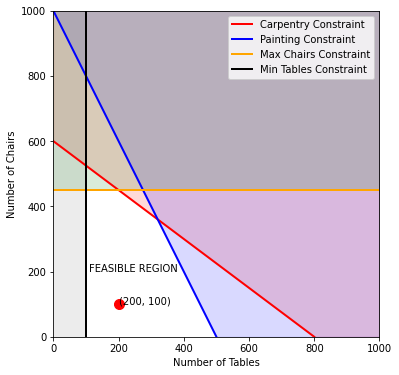

In [ ]:
# same code as above, we just added a point

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) 
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Min Tables constraint
plot([100, 100],[0,1000],'black',lw=2)
fill_between([0,100],[0,0],[1000,1000],color='grey',alpha=0.15)

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# the area in white is the feasible region!
text(110,200,'FEASIBLE REGION')

# add our sample point to evaluate (200, 100)
plot(200,100,'r.',ms=20) # makes a red dot on the plot
annotate('(200, 100)', xy=(200,100), xytext=(200,100)) # adds a label for '(200,100)'

Try another one! How about (C = 300, T = 150)?

$Z = 7T + 5C$

$Z = 7*150 + 5*300$

$Z = 2550$

A little better! We can also plot for ease of viewing.

Text(150, 300, '(150, 300)')

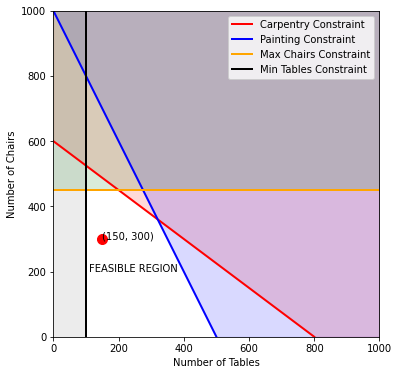

In [ ]:
# same code as above, we just added a point

figure(figsize=(6,6))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) 
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Min Tables constraint
plot([100, 100],[0,1000],'black',lw=2)
fill_between([0,100],[0,0],[1000,1000],color='grey',alpha=0.15)

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# the area in white is the feasible region!
text(110,200,'FEASIBLE REGION')

# add our sample point to evaluate (200, 100)
plot(150, 300,'r.',ms=20) # makes a red dot on the plot
annotate('(150, 300)', xy=(150,300), xytext=(150,300)) # adds a label for '(200,100)'

# Find Corner Points and Plot Them

So - the feasible region has a bunch of possible values for T and C that can make us a profit (within our constraints)... but is there a way we can identify a subset of solutions to evaluate rather than iterating over ALL possible points?

The  corner point property: this property states that an optimal solution to an LP problem will always occur at a corner point of the feasible region. Corner points are the extreme points of the possible solutions - it's where the constraints cross paths.

To solve for corner points, we solve for the intersection of the two constraints equations. This is done by subtracting the equations from each other.

The naming of the points is arbitrary - but we'll start in the bottom left and work our way clockwise for completeness.

* **Point 1** (T=100, C=0)
  * where the minimum table requirement (black line) intersects the X axis (T)
  * we see that the black line interesects at (T = 100, C = 100) -> **(T = 100, C = 0)**
  * this is an easy one - our point is simply the intersection
* **Point 2** (T = 100, C = 450)
  * this is where the minimum table requirement (black line) and maximum chairs constraint (orange line) intersect.
  * using common sense, this intersection would be (C = 450, T = 100)
* **Point 3** (T = 200, C = 450)
  * this is where maximum chairs constraint (orange line) intersects the carpentry constraint (red line)
  * we need to subtract these two equations and get rid of a variable, then plug it back in to calculate the other variable.
  * first, turn the inequalities into equal signs. 

  $3T + 4C = 2400$

  $\ \ \ \ \ \ \ \ \ \ \ C = 450$
  * now we need to subtract these two equations and cancel out one variables. We can multiply the bottom equation by 4 and then subtract the two equations. Then we get

  $3T + 4C - 4C = 2400 - 4*450$

  $3T = 2400 - 1800$

  $3T = 600$

  $T = 200$
  * now, since C is already given to you (C=450), you have the intersection (C = 450, T = 200)

* **Point 4** (T = 320, C = 360)
  * this is where the carpentry constraint and painting constraint intersect - and it's not easily discernible from the graph where these two lines meet. 
  * first, write down both equations and convert to inequalities.

  $3T + 4C = 2400$

  $2T + 1C = 1000$
  * now, we need to cancel a variable. let's multiply the top equation by 2 and the bottom equation by 3. This will allow us to cancel out the T's.

  $6T + 8C = 4800$

  $6T + 3C = 3000$
  * subtract the two equations and solve for C.

  $6T + 8C - 6T -3C = 4800 - 3000$

  $5C = 1800$

  $C = 360$

  * now, take (C = 360) and plug it into either of the original equations to solve for T.

  $3T + 4*360 = 2400$

  $3T = 2400 - 1440$

  $3T = 960$

  $T = 320$

  * and so this point is (T = 320, C = 360)

* **Point 5** (C = 0, T = 500)
  * one more point to go!
  * this is where the Painting Constraint (blue line) intersects the X axis (T). 
  * we already know where this happens from before when we drew the constraints crossing the X and Y axes - it's (C = 0, T = 500)

The same script above is pulled down here for ease of viewing, but now includes our five corner points.

Text(500, 0, '5')

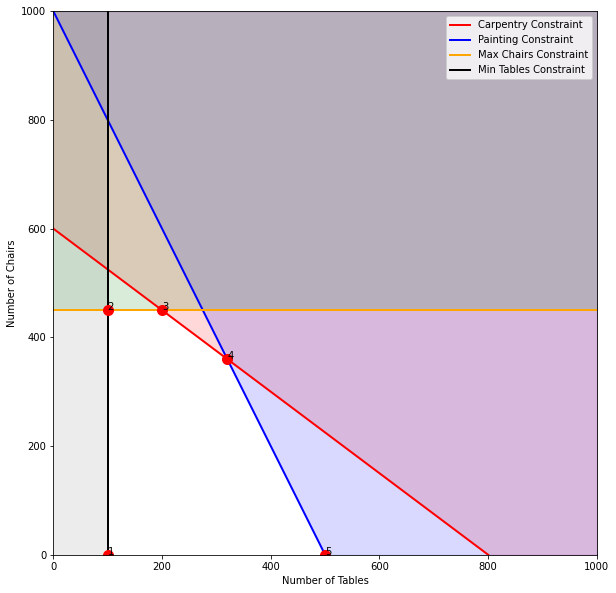

In [ ]:
# this is the example from Pyomo cookbook
# pylab makes it easy to make plots

figure(figsize=(10,10))
subplot(111, aspect='equal')
axis([0,1000,0,1000])
xlabel('Number of Tables')
ylabel('Number of Chairs')

# Carpentry Constraint
y = array([600, 0]) 
x = array([0,800])
plot(x,y,'r',lw=2)
fill_between([0,800,1000], # x area
             [600,0,0], # y area
             [1000,1000,1000], # upper area
             color='red', # color 
             alpha=0.15) # transparency

# Painting Constraint
y = array([1000, 0]) 
x = array([0,500])
plot(x,y,'blue',lw=2)
fill_between([0,500,1000], # x area
             [1000,0,0], # y area
             [1000,1000,1000], # upper area
             color='blue', # color 
             alpha=0.15) # transparency

# Max Chairs Constraint (horizontal line)
y = array([450, 450]) 
x = array([1000, 0])
plot(x, y,'orange',lw=2)
fill_between([0, 1000,1000], # x area
             [450, 450,0], # y area
             [1000,1000,1000], # upper area
             color='green', # color 
             alpha=0.15) # transparency

# Min Tables constraint
plot([100, 100],[0,1000],'black',lw=2)
fill_between([0,100],[0,0],[1000,1000],color='grey',alpha=0.15)

legend(['Carpentry Constraint','Painting Constraint','Max Chairs Constraint', 'Min Tables Constraint'])

# Contours of profit?

# # Optimum
plot(100,0,'r.',ms=20) # makes a red dot on the plot
annotate('1', xy=(100,0), xytext=(100,0)) # adds a label

plot(100,450,'r.',ms=20) # makes a red dot on the plot
annotate('2', xy=(100,450), xytext=(100,450)) # adds a label

plot(200,450,'r.',ms=20) # makes a red dot on the plot
annotate('3', xy=(200,450), xytext=(200,450)) # adds a label

plot(320,360,'r.',ms=20) # makes a red dot on the plot
annotate('4', xy=(320,360), xytext=(320,360)) # adds a label

plot(500,0,'r.',ms=20) # makes a red dot on the plot
annotate('5', xy=(500,0), xytext=(500,0)) # adds a label

# Evaluation of Corner Points

Recall our objective function:

$Max(Z) = 7T + 5C$ `objective function`

For each corner point we have, we need to evaluate how the values of C and T will influence profit. We seek to maximize profit.

* Point 1: (T = 100, C = 0)
  * $Profit = 7*100 + 5*0 = 700\ USD$
* Point 2: (T = 100, C = 450)
  * $Profit = 7*100 + 5*450 = 2950\ USD$
* Point 3: (T = 200, C = 450)
  * $Profit = 7*200 + 5*450 = 3650\ USD$
* Point 4: (T = 320, C = 360)
  * $Profit = 7*320 + 5*360 = 4040\ USD$ **[winner!]**
* Point 5: (T = 500, C = 0)
  * $Profit = 7*500 + 5*0 = 3500\ USD$